#**Aula 3:**

- Curva com o crescimento logístico;

- Mudança de tendência em uma série temporal;

- Como decidir se houve mudança de tendência através de um gráfico de barras.

In [ ]:
#importando as bibliotecas:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Parâmetros para formatação dos gráficos: 
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)

In [ ]:
url = 'https://github.com/vqrca/bootcamp_alura_aulas/blob/main/Modulo_3/dados_covid_sp.zip?raw=true'

In [ ]:
#Importando os dados:
dados = pd.read_csv(url, sep = ';', compression='zip')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [ ]:
#formatando os dados da coluna 'datahora':
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

In [ ]:
#Escolhendo um município específico:
dados_sp = dados.query('nome_munic == "São Paulo"')

Separando os dados de treino e fazendo previsões:

In [ ]:
df = pd.DataFrame()

In [ ]:
df['ds'] = dados_sp['datahora'][:400]

In [ ]:
df['y'] = dados_sp['casos_novos'][:400]

In [ ]:
modelo = Prophet()

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataFramefuture = modelo.make_future_dataframe(periods=43)
dataFramefuture.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [ ]:
previsao = modelo.predict(dataFramefuture)

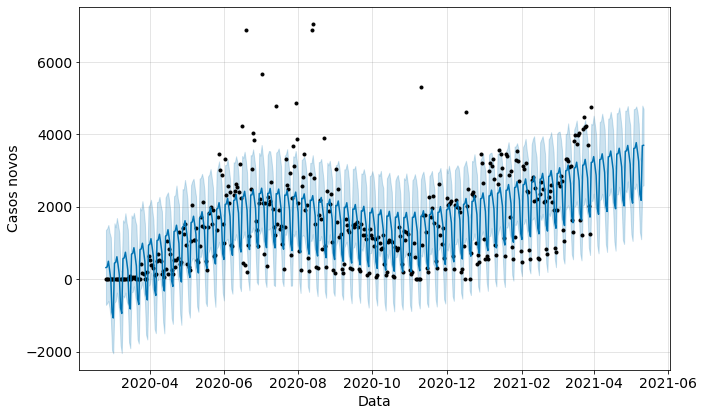

In [ ]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6));


Adicionando os *Changepoints* ao modelo:

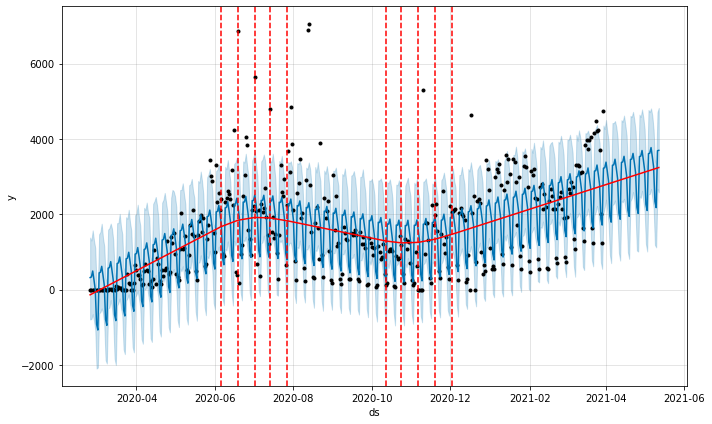

In [ ]:
fig = modelo.plot(previsao, figsize=(10,6))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

Vemos possíveis pontos de mudanças de tendência. 

Novo modelo adicionando `n_changepoints`:

In [ ]:
modelo = Prophet(n_changepoints=50)
#n_changepoints=50: recortes

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataFramefuture = modelo.make_future_dataframe(periods=43)


In [ ]:
previsao = modelo.predict(dataFramefuture)

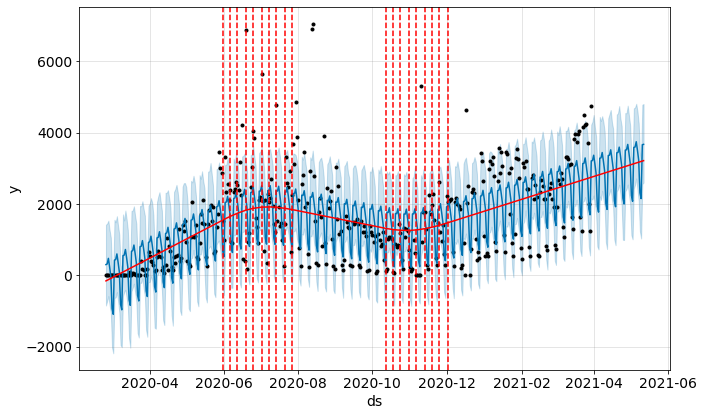

In [ ]:
fig = modelo.plot(previsao, figsize=(10,6))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

Aumentando a flexibilidade dos `changepoints `:

In [ ]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=10.0)
#changepoint_prior_scale: quanto menor o valor menos mudanças serão vistas. 

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataFramefuture = modelo.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo.predict(dataFramefuture)

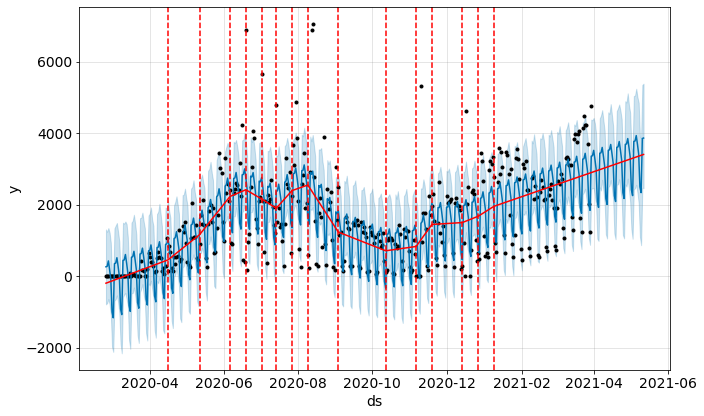

In [ ]:
fig = modelo.plot(previsao, figsize=(10,6))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

A curva está se ajustando melhor aos pontos dessa forma.

##**Desafio 11: Identificar potenciais changepoints.**

`estimator.changepoints` contém as datas em que ocorrem os pontos de mudança. Se você filtrar essas datas de seu dataframe, obterá valores de ponto de mudança.

In [ ]:
estimator = Prophet()
estimator.fit(df)
df.loc[df["ds"].isin(estimator.changepoints)]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y
8947,2020-03-09,0
17332,2020-03-22,0
25072,2020-04-03,387
33457,2020-04-16,144
41842,2020-04-29,1241
50227,2020-05-12,911
57967,2020-05-24,640
66352,2020-06-06,2408
74737,2020-06-19,6877
83122,2020-07-02,5656


Gráfico mostrando os potenciais *changepoints*: 

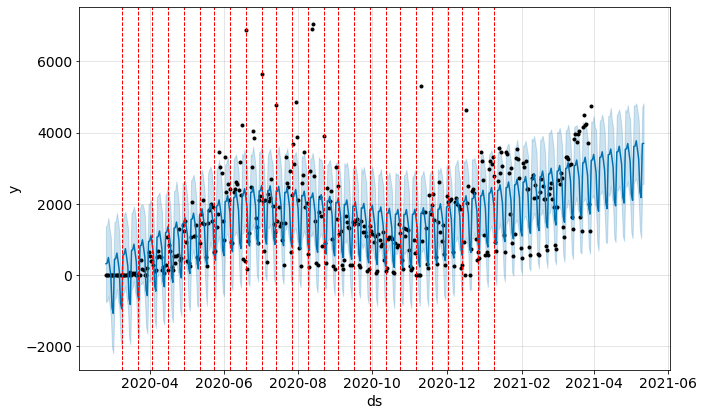

In [ ]:
fig = modelo.plot(previsao, figsize=(10,6))
for changepoint in modelo.changepoints:
    plt.axvline(changepoint,ls='--', lw=1, color='red')

Gráfico mostrando as magnitudes dos *changepoints*: 

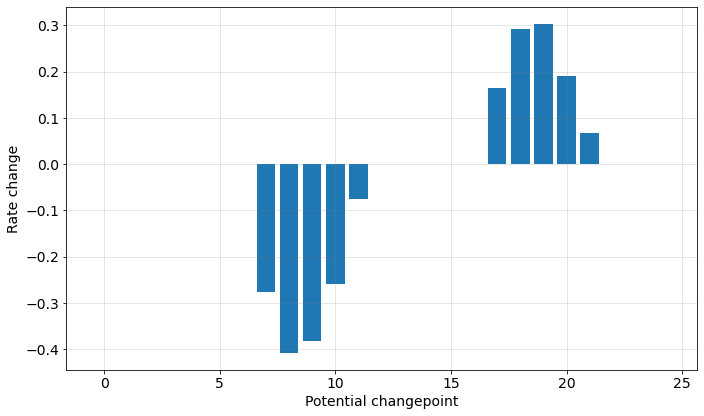

In [ ]:
deltas = modelo.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

##**Desafio 12: Desenvolver uma função roda o modelo automaticamente.**

In [ ]:
#Função para previsão de casos acumulados:
def previsao_dias_acumulados(dias : int):
  dias_para_prever = dias
  periodo_em_dias = len(dados_sp) - dias_para_prever

  df_casos_acumulados = pd.DataFrame()
  df_casos_acumulados['ds'] = dados_sp['datahora'][:periodo_em_dias]
  df_casos_acumulados['y'] = dados_sp['casos'][:periodo_em_dias]
  modelo_casos_acumulados = Prophet()


  modelo_casos_acumulados.fit(df_casos_acumulados)
  dataframefuturo_casos_acumulados = modelo_casos_acumulados.make_future_dataframe(periods=dias_para_prever)
  previsao_casos_acumulados = modelo_casos_acumulados.predict(dataframefuturo_casos_acumulados)

  df_teste_casos_acumulados = pd.DataFrame()
  df_teste_casos_acumulados['ds'] = dados_sp['datahora'][periodo_em_dias:]
  df_teste_casos_acumulados['y'] = dados_sp['casos'][periodo_em_dias:]

  titulo = str(periodo_em_dias) + " dias de teste | " + str(dias_para_prever) + " dias de previsão"


  modelo_casos_acumulados.plot(previsao_casos_acumulados,xlabel='Data',ylabel='Número de casos acumulados', figsize=(10,6));
  plt.title(titulo)
  plt.plot(df_teste_casos_acumulados['ds'], df_teste_casos_acumulados['y'], '.r')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


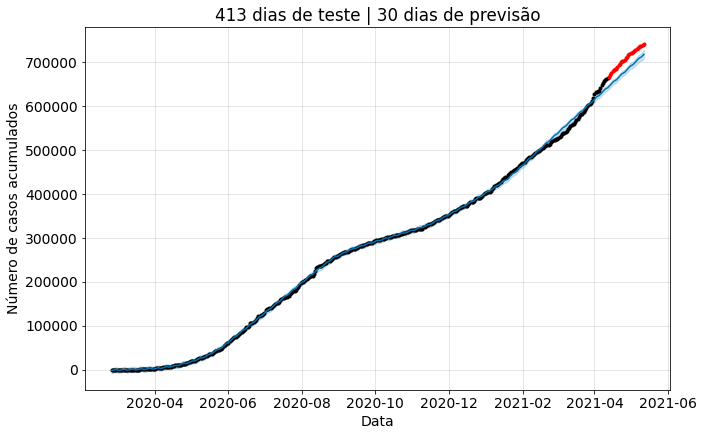

In [ ]:
previsao_dias_acumulados(30)

In [ ]:
#Função para previsão de casos novos:
def previsao_dias_novos(dias : int):
  dias_para_prever = dias
  periodo_em_dias = len(dados_sp) - dias_para_prever

  df_casos_novos = pd.DataFrame()
  df_casos_novos['ds'] = dados_sp['datahora'][:periodo_em_dias]
  df_casos_novos['y'] = dados_sp['casos_novos'][:periodo_em_dias]
  modelo_casos_novos = Prophet()


  modelo_casos_novos.fit(df_casos_novos)
  dataframefuturo_casos_novos = modelo_casos_novos.make_future_dataframe(periods=dias_para_prever)
  previsao_casos_novos = modelo_casos_novos.predict(dataframefuturo_casos_novos)

  df_teste_casos_novos = pd.DataFrame()
  df_teste_casos_novos['ds'] = dados_sp['datahora'][periodo_em_dias:]
  df_teste_casos_novos['y'] = dados_sp['casos_novos'][periodo_em_dias:]

  titulo = str(periodo_em_dias) + " dias de teste | " + str(dias_para_prever) + " dias de previsão"

  modelo_casos_novos.plot(previsao_casos_novos,xlabel='Data',ylabel='Número de casos novos', figsize=(10,6));
  plt.title(titulo)
  plt.plot(df_teste_casos_novos['ds'], df_teste_casos_novos['y'], '.r')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


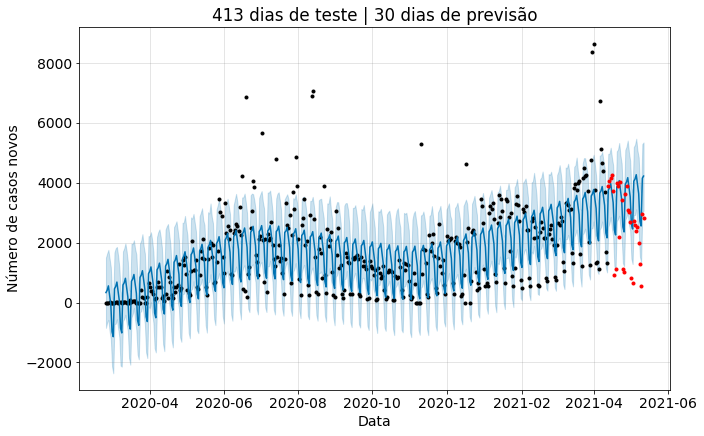

In [ ]:
previsao_dias_novos(30)

In [ ]:
#Função para plotar gráficos com changepoints:
def plotar_grafico_com_changepoints(changepoint_prior_scale_input=0.05, n_changepoints_input=25, periods_input=43):
  modelo = Prophet(n_changepoints=n_changepoints_input, changepoint_prior_scale=changepoint_prior_scale_input)
  modelo.fit(df)
  dataframefuturo = modelo.make_future_dataframe(periods=periods_input)
  previsao = modelo.predict(dataframefuturo)
  fig = modelo.plot(previsao, figsize=(10,6))
  a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

  

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


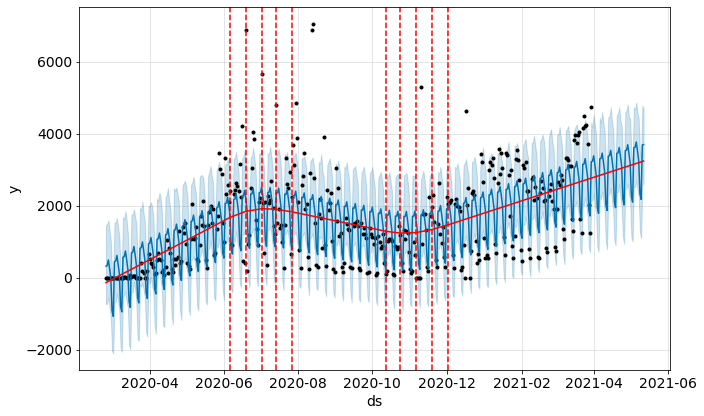

In [ ]:
plotar_grafico_com_changepoints()

In [ ]:
#Função para plotar gráficos com changepoints de data específica:
def plotar_grafico_com_changepoint_na_mao(points = ['2020-12-25'], periods_input=43):
  modelo = Prophet(changepoints=points)
  modelo.fit(df)
  dataframefuturo = modelo.make_future_dataframe(periods=periods_input)
  previsao = modelo.predict(dataframefuturo)
  fig = modelo.plot(previsao, figsize=(10,6))
  a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


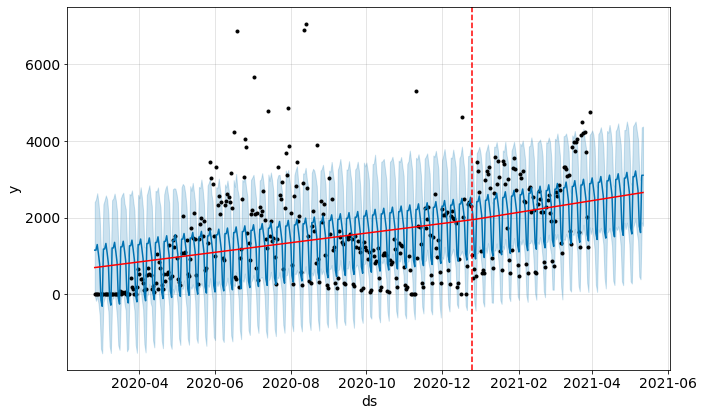

In [ ]:
plotar_grafico_com_changepoint_na_mao()